In [1]:
#한글 뉴스 데이터 분석
import pandas as pd
df = pd.read_csv('c:/data/news/news.csv')
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [2]:
#클래스별 샘플 개수
df['category'].value_counts()

2    4682
1    2872
3    2121
Name: category, dtype: int64

In [3]:
#전처리 함수
import re
def preprocessing(sentence):
    # [가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]을 제외한 나머지를 공백으로 대체
    sentence = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

In [4]:
#content필드에 preprocessing함수 적용
df['content_cleaned'] = df['content'].apply(preprocessing)
content = df['content_cleaned'].tolist()
content[0]

'     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할 

In [5]:
#문서 집합에서 단어 토큰을 생성하고 각 단어의 빈도를 세어 인코딩한 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000) # 단어수 제한
X = vectorizer.fit_transform(content)
X.shape

(9675, 1000)

In [6]:
#l2 정규화
from sklearn.preprocessing import normalize
X = normalize(X)
X[0].toarray()

array([[0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.07930516, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07930516, 0.        ,
        0.        , 0.23791548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [7]:
#k-means 알고리즘
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [8]:
#그래프 출력을 위해 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(X.toarray())
df2 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df2.index = df['category']
df2.head()

,component1,component2
category,,
1,-0.067152,0.081724
1,-0.067675,0.266838
1,-0.044708,0.155463
1,-0.046020,0.117295
1,-0.001837,-0.124182


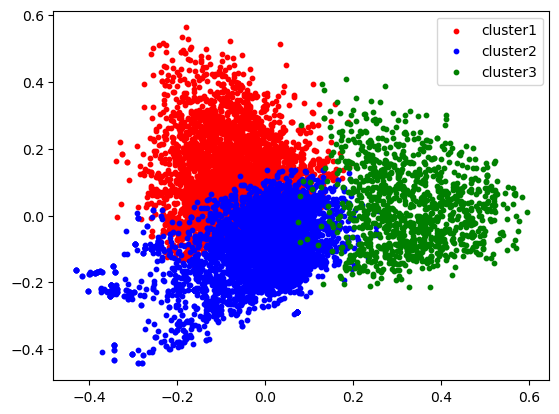

In [9]:
#시각화
import matplotlib.pyplot as plt
plt.scatter(df2.iloc[kmeans.labels_ == 0, 0], df2.iloc[kmeans.labels_ == 0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(df2.iloc[kmeans.labels_ == 1, 0], df2.iloc[kmeans.labels_ == 1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(df2.iloc[kmeans.labels_ == 2, 0], df2.iloc[kmeans.labels_ == 2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()
plt.show()

In [10]:
#TF-IDF 벡터 생성
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000) # 단어수 제한
X = vectorizer.fit_transform(content)
X.shape

(9675, 1000)

In [11]:
#k-means 알고리즘
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10).fit(X)
kmeans.labels_

array([2, 1, 1, ..., 1, 1, 1])

In [12]:
#그래프 출력을 위해 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(X.toarray())
df2 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df2.index = df['category']
df2.head()

,component1,component2
category,,
1,-0.062244,0.077658
1,-0.050460,-0.014323
1,-0.052209,0.031758
1,-0.063768,0.113917
1,-0.056140,0.034220


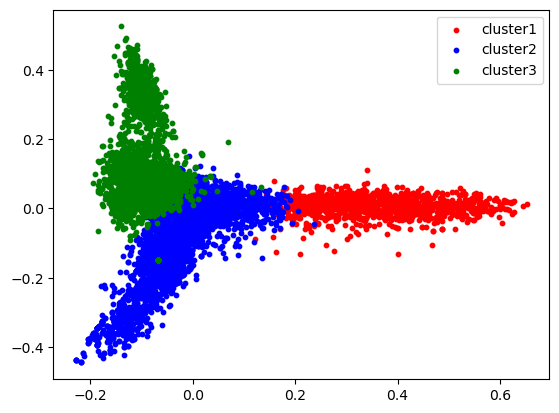

In [13]:
#시각화
import matplotlib.pyplot as plt
plt.scatter(df2.iloc[kmeans.labels_ == 0, 0], df2.iloc[kmeans.labels_ == 0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(df2.iloc[kmeans.labels_ == 1, 0], df2.iloc[kmeans.labels_ == 1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(df2.iloc[kmeans.labels_ == 2, 0], df2.iloc[kmeans.labels_ == 2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()
plt.show()